# <span style="color:Maroon">Crab Age Prediction EDA

## <span style="color:Maroon">Problem Statement: 
###### The file data.csv contains the observation of a study on crabs found around the Boston Area.

###### The challenge consist of making some sense out of those data. We're notably looking for a method to predict the age of a crab given its features.

### <span style="color:Maroon">Part 1: EDA: Exploratory Data Analysis

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [2]:
os.getcwd()

'C:\\Users\\sidhu\\Downloads\\CrabAgePrediction\\Codes'

In [3]:
# Read the csv file data
os.chdir('..\\Data\\')
crabsdata = pd.read_csv('data.csv')
crabsdata.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
crabsdata = pd.get_dummies(crabsdata, prefix=['Sex'])
crabsdata.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0


In [5]:
# distribution of the variables
crabsdata.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.00000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791,0.314667,0.316722,0.36861
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967,0.464443,0.465258,0.48249
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.000000,0.00000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000,0.000000,0.000000,0.00000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662132,10.000000,0.000000,0.000000,0.00000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000,1.000000,1.000000,1.00000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491247,29.000000,1.000000,1.000000,1.00000


### <span style="color:Maroon">1.1: Age Variable

In [6]:
# Change directory to Images
os.chdir('..\\Images\\')

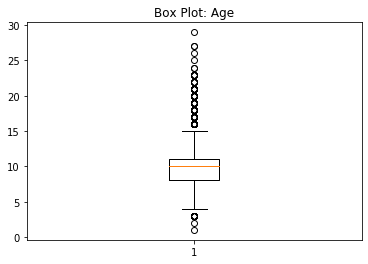

In [7]:
# Box Plot
plt.boxplot(crabsdata["Age"])
plt.title("Box Plot: Age")
plt.savefig("Box_Plot_Age.png")
plt.show()

<span style="color:Blue">__Comments:__ Age variable do have outliers. Hence we shall cap the age at 20 (As only few observations have age greater than 20)

In [8]:
# Cap outlier values
crabsdata_outliertreated = crabsdata.copy()
crabsdata_outliertreated["Age"] = np.where(crabsdata_outliertreated["Age"]>20, 20, crabsdata_outliertreated["Age"])

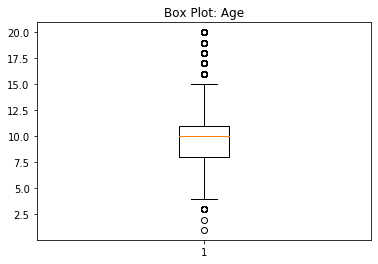

In [9]:
# Box Plot
plt.boxplot(crabsdata_outliertreated["Age"])
plt.title("Box Plot: Age")
plt.savefig("Box_Plot_Age_Capped.png")
plt.show()

<span style="color:Blue"> __Comments:__ The outlier presence in the data has reduced to a certain extent

### <span style="color:Maroon">1.2: Gender (Sex) Variable:

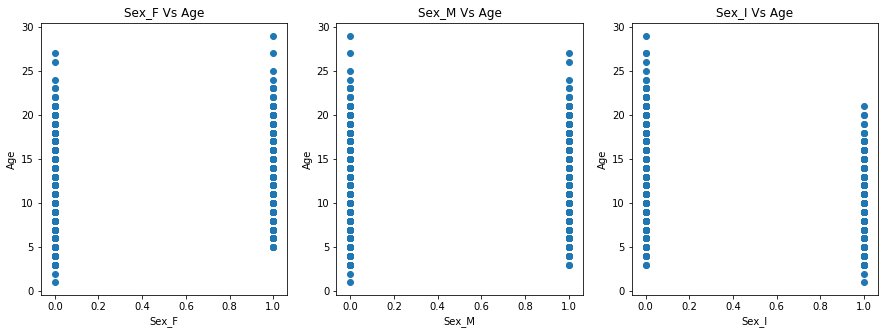

In [10]:
plt.rcParams['figure.figsize'] = [15, 5]
# Scatter plot between Sex_F and Age
plt.subplot(1,3,1)
plt.scatter(crabsdata["Sex_F"], crabsdata["Age"])
plt.xlabel("Sex_F")
plt.ylabel("Age")
plt.title("Sex_F Vs Age")

# Scatter plot between Sex_F and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata["Sex_M"], crabsdata["Age"])
plt.xlabel("Sex_M")
plt.ylabel("Age")
plt.title("Sex_M Vs Age")

# Scatter plot between Sex_F and Age
plt.subplot(1,3,3)
plt.scatter(crabsdata["Sex_I"], crabsdata["Age"])
plt.xlabel("Sex_I")
plt.ylabel("Age")
plt.title("Sex_I Vs Age")

plt.savefig("Scatter_plot_Gender.png")
plt.show()

<span style="color:Blue"> __Comments:__ "I" Gender on an average tends to be lower in weight compared to "M" and "F"

### <span style="color:Maroon">1.3: Length Variable: 

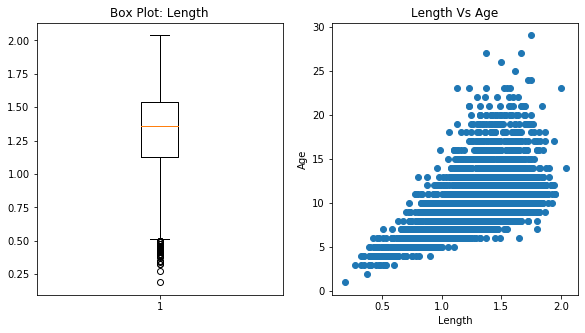

In [11]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata["Length"])
plt.title("Box Plot: Length")

# Scatter plot between Length and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata["Length"], crabsdata["Age"])
plt.xlabel("Length")
plt.ylabel("Age")
plt.title("Length Vs Age")
plt.savefig("Box_scatter_length.png")
plt.show()

<span style="color:Blue">__Comments:__ Length of the crab has a positive linear realtionship with the age of crab. Old Crabs tend to be longer. There are no outliers as can be seem from the box plot and scatter plot.

### <span style="color:Maroon">1.4: Diameter Variable

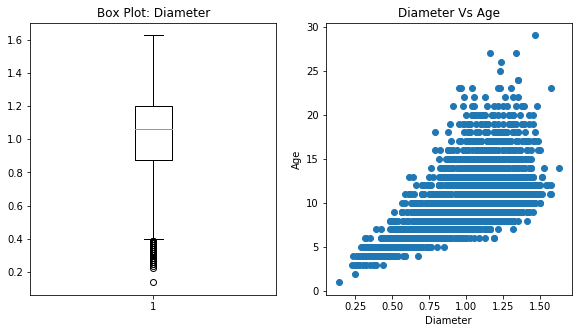

In [12]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata["Diameter"])
plt.title("Box Plot: Diameter")

# Scatter plot between Diameter and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata["Diameter"], crabsdata["Age"])
plt.xlabel("Diameter")
plt.ylabel("Age")
plt.title("Diameter Vs Age")
plt.savefig("Box_Scatter_diameter.png")
plt.show()

<span style="color:Blue">__Comments:__ Diameter of the crab has a positive linear realtionship with the age of crab. Older Crabs have larger diameter. There are no extreme outlier based on box plot and scatter plot

### <span style="color:Maroon">1.5: Height Variable

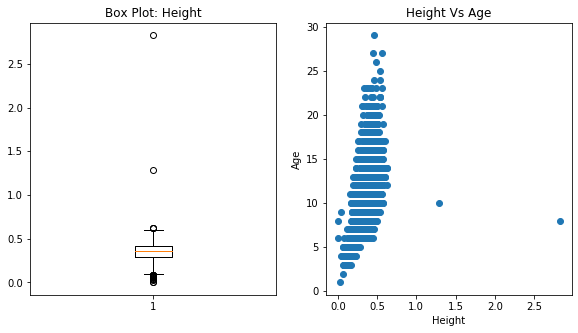

In [13]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata["Height"])
plt.title("Box Plot: Height")

# Scatter plot between Height and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata["Height"], crabsdata["Age"])
plt.xlabel("Height")
plt.ylabel("Age")
plt.title("Height Vs Age")
plt.savefig("Box_Scatter_height.png")
plt.show()

<span style="color:Blue">__Comments:__ 
Height of the crab has a positive linear realtionship with the age of crab.Older crabs have higher heights. There are outlier visible in the Height variable, both from Box plot and scatter plot. There are two possible ways to take care of outlier proble:
    
<span style="color:Blue"> 1. Exclude them from the dataset (could be a data capturing or entry error)
        
<span style="color:Blue"> 2. Cap the height variable
        
<span style="color:Blue">When we look at the scatter plot, we see that though the height is way too high, the age seems to be very similar to crabs with height of 0.5 . The said observations seems to be outliers. Hence will be excluded from the dataset

In [14]:
# Drop the observations with height > 1
crabsdata_outliertreated = crabsdata_outliertreated[crabsdata_outliertreated["Height"]<1]

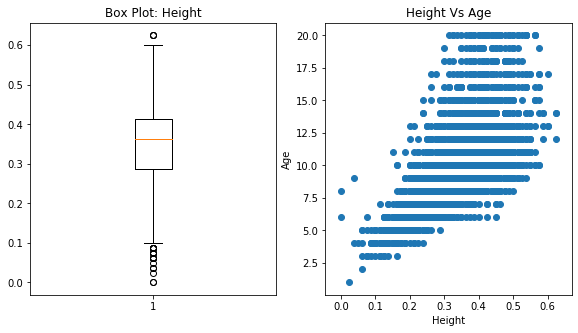

In [15]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata_outliertreated["Height"])
plt.title("Box Plot: Height")

# Scatter plot between Height and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata_outliertreated["Height"], crabsdata_outliertreated["Age"])
plt.xlabel("Height")
plt.ylabel("Age")
plt.title("Height Vs Age")
plt.savefig("Box_Scatter_height_filtered.png")
plt.show()

<span style="color:Blue">__Comments:__ After excluding those two observations, the height variable has no more outliers

### <span style="color:Maroon">1.6: Weight Variable

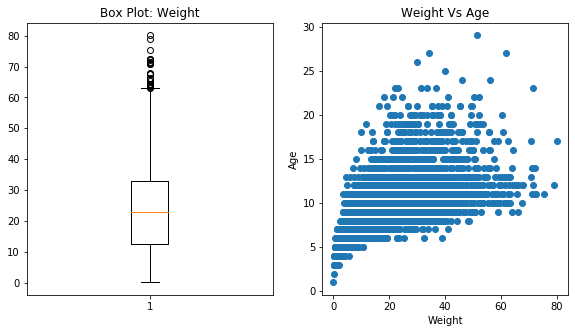

In [16]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata["Weight"])
plt.title("Box Plot: Weight")

# Scatter plot between Weight and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata["Weight"], crabsdata["Age"])
plt.xlabel("Weight")
plt.ylabel("Age")
plt.title("Weight Vs Age")
plt.savefig("Box_Scatter_width.png")
plt.show()

<span style="color:Blue">__Comments:__ There is a positive linear relationship between weight and age. As crabs grow old, they tend to be heavier

### <span style="color:Maroon">1.7: Sucked Weight Variable

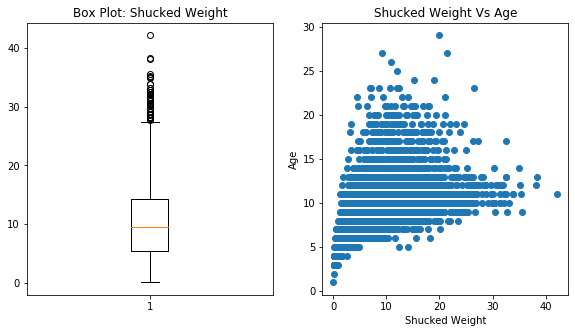

In [17]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata["Shucked Weight"])
plt.title("Box Plot: Shucked Weight")

# Scatter plot between Shucked Weight and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata["Shucked Weight"], crabsdata["Age"])
plt.xlabel("Shucked Weight")
plt.ylabel("Age")
plt.title("Shucked Weight Vs Age")
plt.savefig("Box_Scatter_Shuckedweight.png")
plt.show()

<span style="color:Blue">__Comments:__ There are outliers in the Sucked weight variable too. The same can be inferred from Box plot and scatter plot. For purpose of model building, we shall exclude, all Sucked weight 35

In [18]:
# Exclude observations with Sucked weight greater than 35
crabsdata_outliertreated = crabsdata_outliertreated[crabsdata_outliertreated["Shucked Weight"]<=35]

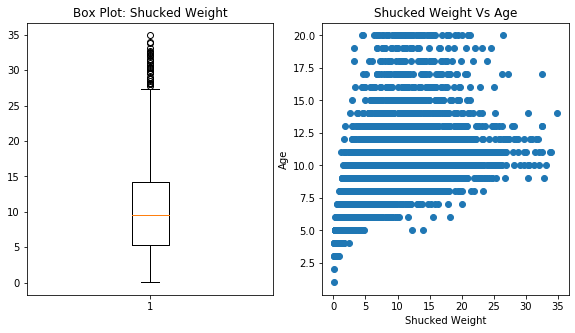

In [19]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata_outliertreated["Shucked Weight"])
plt.title("Box Plot: Shucked Weight")

# Scatter plot between Shucked Weight and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata_outliertreated["Shucked Weight"], crabsdata_outliertreated["Age"])
plt.xlabel("Shucked Weight")
plt.ylabel("Age")
plt.title("Shucked Weight Vs Age")
plt.savefig("Box_Scatter_Shuckedweight_filtered.png")
plt.show()

<span style="color:Blue">__Comments:__ The extreme observations have been excluded.

### <span style="color:Maroon">1.8: Viscera Weight Variable

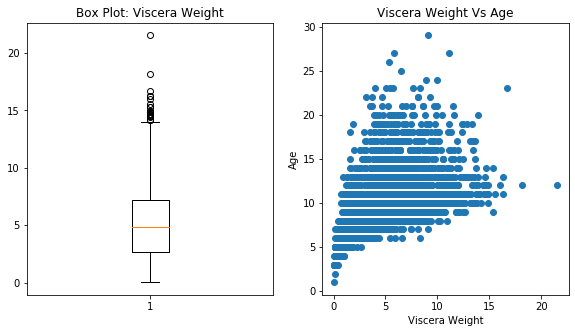

In [20]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata["Viscera Weight"])
plt.title("Box Plot: Viscera Weight")

# Scatter plot between Viscera Weight and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata["Viscera Weight"], crabsdata["Age"])
plt.xlabel("Viscera Weight")
plt.ylabel("Age")
plt.title("Viscera Weight Vs Age")
plt.savefig("Box_Scatter_Visceraweight.png")
plt.show()

<span style="color:Blue">__Comments:__ Viscera Weight has a positive linear relationship with age variable. From box plot and scatter plot, we can observe outlier presence. Hence observations with Viscera Weight > 18 will be excluded

In [21]:
# Exclude observations with Viscera weight greater than 18
crabsdata_outliertreated = crabsdata_outliertreated[crabsdata_outliertreated["Viscera Weight"]<=18]

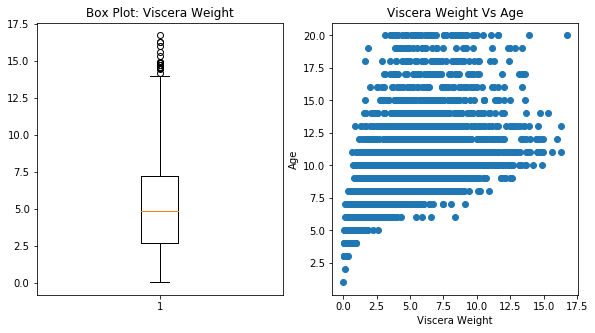

In [22]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata_outliertreated["Viscera Weight"])
plt.title("Box Plot: Viscera Weight")

# Scatter plot between Viscera Weight and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata_outliertreated["Viscera Weight"], crabsdata_outliertreated["Age"])
plt.xlabel("Viscera Weight")
plt.ylabel("Age")
plt.title("Viscera Weight Vs Age")
plt.savefig("Box_Scatter_Visceraweight_filtered.png")
plt.show()

<span style="color:Blue">__Comments:__ Extreme values have been excluded

### <span style="color:Maroon">1.9: Shell Weight Variable

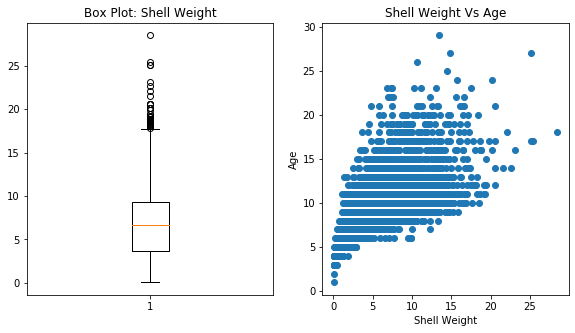

In [23]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata["Shell Weight"])
plt.title("Box Plot: Shell Weight")

# Scatter plot between Shell Weight and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata["Shell Weight"], crabsdata["Age"])
plt.xlabel("Shell Weight")
plt.ylabel("Age")
plt.title("Shell Weight Vs Age")
plt.savefig("Box_Scatter_Shellweight.png")
plt.show()

<span style="color:Blue">__Comments:__ Shell weight has a positive realtionship with age. Older crabs tend to have higher shell weights. There are few outlier observations in the dataset.For model building, we shall exclude the outlier observations

In [24]:
# Exclude observations with Shell weight greater than 21
crabsdata_outliertreated = crabsdata_outliertreated[crabsdata_outliertreated["Shell Weight"]<=21]

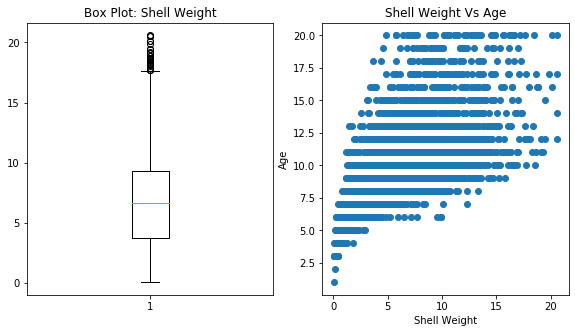

In [25]:
# Box Plot
plt.subplot(1,3,1)
plt.boxplot(crabsdata_outliertreated["Shell Weight"])
plt.title("Box Plot: Shell Weight")

# Scatter plot between Shell Weight and Age
plt.subplot(1,3,2)
plt.scatter(crabsdata_outliertreated["Shell Weight"], crabsdata_outliertreated["Age"])
plt.xlabel("Shell Weight")
plt.ylabel("Age")
plt.title("Shell Weight Vs Age")
plt.savefig("Box_Scatter_Shellweight_filtered.png")
plt.show()

<span style="color:Blue">__Comment:__ All variables have been individually looked into. Required treatment (flooring, capoing, filtering) has been done

### <span style="color:Maroon">1.10: Gender Distribution by Age

In [26]:
# subset the data
f_df = crabsdata_outliertreated[crabsdata_outliertreated["Sex_F"]==1][["Weight", "Age"]]
m_df = crabsdata_outliertreated[crabsdata_outliertreated["Sex_M"]==1][["Weight", "Age"]]
i_df = crabsdata_outliertreated[crabsdata_outliertreated["Sex_I"]==1][["Weight", "Age"]]

# Group by Age
f_df = f_df.groupby("Age").count()
m_df = m_df.groupby("Age").count()
i_df = i_df.groupby("Age").count()

# rename columns
f_df.columns = ["Count"]
m_df.columns = ["Count"]
i_df.columns = ["Count"]

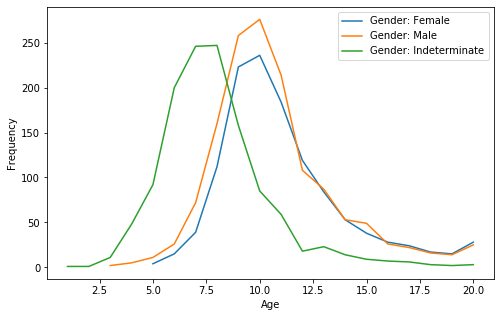

In [27]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(f_df.index, f_df["Count"], label="Gender: Female")
plt.plot(m_df.index, m_df["Count"], label="Gender: Male")
plt.plot(i_df.index, i_df["Count"], label="Gender: Indeterminate")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Age - Gender.png")

<span style="color:Blue">__Comment:__ Till age of 7.5 months, most crabs sex cannot be determined. 

In [28]:
# Save the data
os.chdir('..\\Data')
crabsdata_outliertreated.to_csv("data_treated.csv", index=False)